#### Abstract:
In this notebook, we are going to dive into the world of game recommendations on Steam, the largest digital distribution platform for PC gaming.

* Product is_recommended - recommended by User or Not
* Product app_id - Unique Game Id
* Game hours - Average hours spent by an user
* Product title;
* Product release date;
* OS support (Windows, MacOS, Linux);
* Product rating category;
* Ratio of positive feedbacks;
* user_reviews - Number of reviews left;
* Pricing (original and discounted);
* Steam Deck compatibility.



In [33]:
# @title Java H20 Installation { form-width: "100px", display-mode: "form" }
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [34]:
# @title Python H2O Installation { display-mode: "form" }
! pip install h2o

In [35]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_oi0hlh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.017 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ChandrasekaranN/INFO-DSE/main/games.csv"

df = pd.read_csv(url)

In [37]:
df.dtypes

title              object
app_id              int64
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object

## Correlation Matrix

<ipython-input-38-a745bcf1f47f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

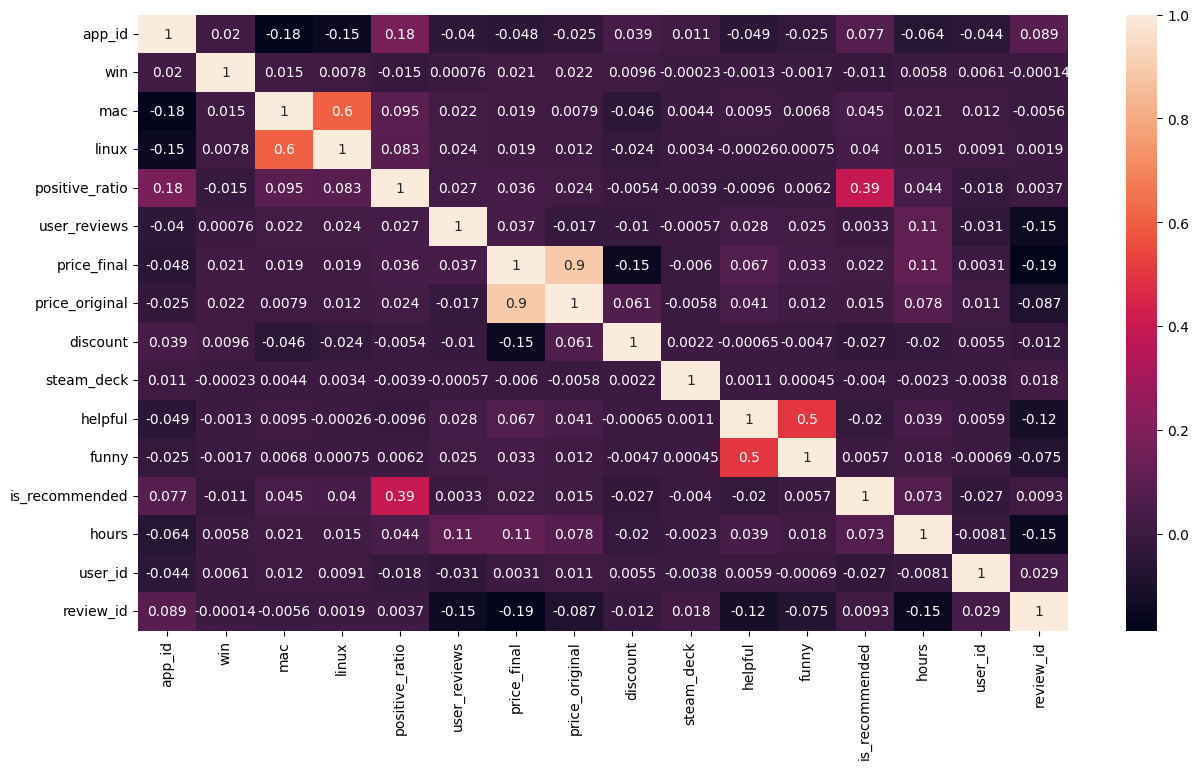

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), annot=True)

In [39]:
df.shape

(37518, 20)

In [40]:
df.head()

,title,app_id,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,! That Bastard Is Trying To Steal Our Gold !,449940,2016-03-03,True,False,True,Mixed,58,51,2.99,2.99,0.0,True,17,5,2016-04-05,True,1.8,10553664,27835814
1,! Wild Russia !,1287250,2020-04-28,True,False,False,Mixed,63,57,1.99,19.99,90.0,True,4,0,2020-09-01,True,0.9,5004930,27808974
2,!AnyWay!,866510,2018-06-06,True,False,False,Mostly Positive,70,345,1.99,1.99,0.0,True,0,0,2021-11-08,True,5.0,8417401,27756114
3,!LABrpgUP!,870990,2018-06-13,True,False,False,Mixed,50,14,0.99,0.99,0.0,True,10,0,2019-07-15,False,0.9,7000209,27933193
4,#AkiRobots,861520,2020-12-04,True,True,True,Positive,93,15,7.99,7.99,0.0,True,0,0,2020-12-19,True,7.0,6139530,39134831


## AutoML

In [41]:
from h2o.automl import H2OAutoML

# Load the data into a H2O Frame
df_Automl = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
# Set the target variable
target = "is_recommended"

In [43]:
# Setting up the data split between training and test dataset
pct_rows = 0.80
df_train, df_test = df_Automl.split_frame([pct_rows])

In [44]:
# Define the AutoML settings
aml = H2OAutoML(max_runtime_secs=300, seed=1)

In [45]:
X = df_train.columns
X.remove(target)
X.remove("title")

In [46]:
# Train the AutoML model
aml.train(x=X, y=target, training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/12
# GBM base models (used / total),4/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [53]:
predictions = aml.leader.predict(df_test)

conf_matrix = predictions['predict'].table().as_data_frame()
conf_matrix

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,predict,Count
0,False,825
1,True,6813


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240220_34458,0.815815,0.424988,0.929335,0.386841,0.369963,0.136872,3137,0.144869,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240220_34458,0.815793,0.424729,0.929388,0.370071,0.369778,0.136736,2547,0.138459,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_34458,0.811841,0.428276,0.927226,0.358284,0.371209,0.137796,1938,0.055008,StackedEnsemble
GBM_3_AutoML_2_20240220_34458,0.81171,0.429372,0.926034,0.366104,0.371774,0.138216,3552,0.018398,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34458,0.811486,0.428647,0.927506,0.370845,0.371618,0.1381,1228,0.026968,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_34458,0.811219,0.428971,0.926531,0.370915,0.371616,0.138098,1389,0.051772,StackedEnsemble
GBM_2_AutoML_2_20240220_34458,0.809397,0.431023,0.926827,0.362503,0.372917,0.139067,3279,0.02846,GBM
XGBoost_3_AutoML_2_20240220_34458,0.809205,0.430662,0.925999,0.349512,0.372336,0.138634,1620,0.004689,XGBoost
GBM_1_AutoML_2_20240220_34458,0.808319,0.431548,0.925717,0.36217,0.372803,0.138982,6924,0.022083,GBM
GBM_4_AutoML_2_20240220_34458,0.805985,0.4338,0.924559,0.36461,0.373641,0.139607,5109,0.018028,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_2_20240220_34458

,False,True,Error,Rate
False,543.0,1281.0,0.7023,(1281.0/1824.0)
True,220.0,5594.0,0.0378,(220.0/5814.0)
Total,763.0,6875.0,0.1965,(1501.0/7638.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

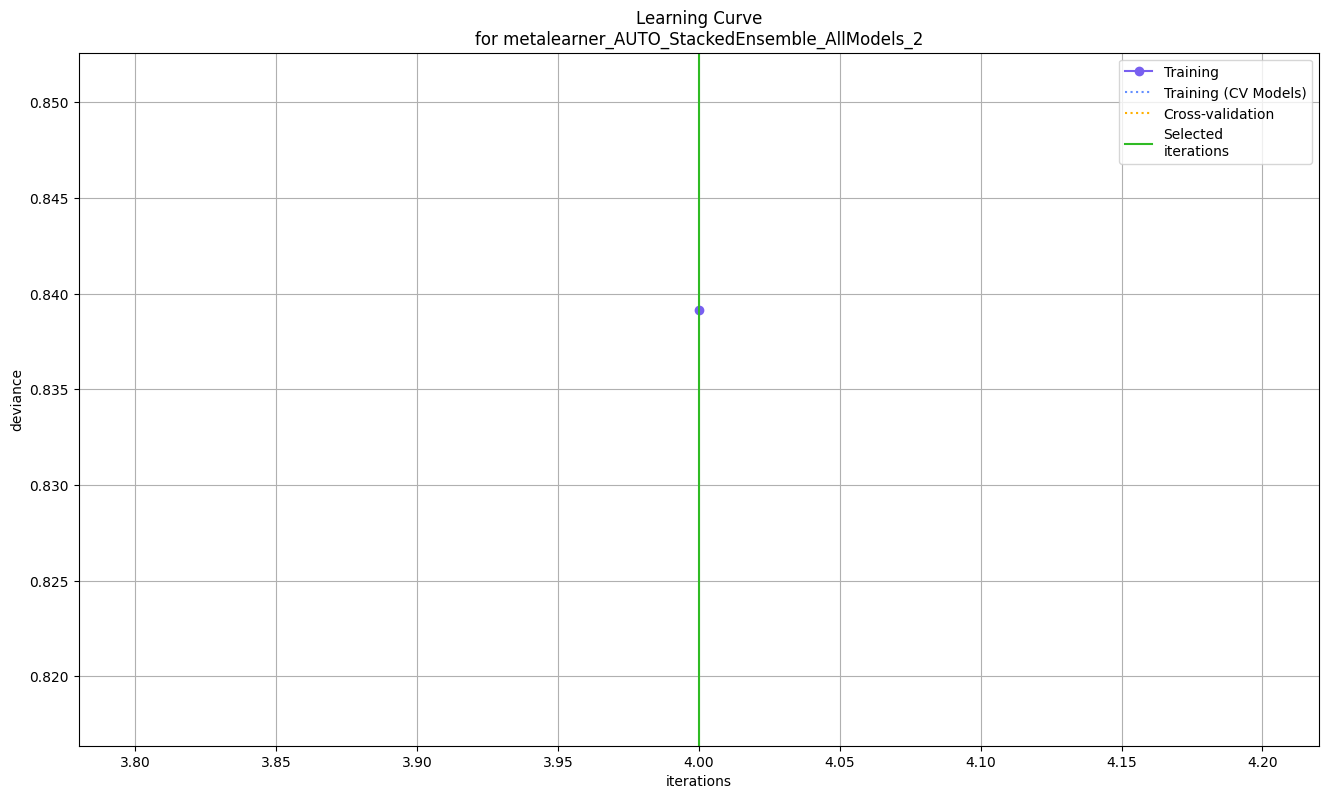

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

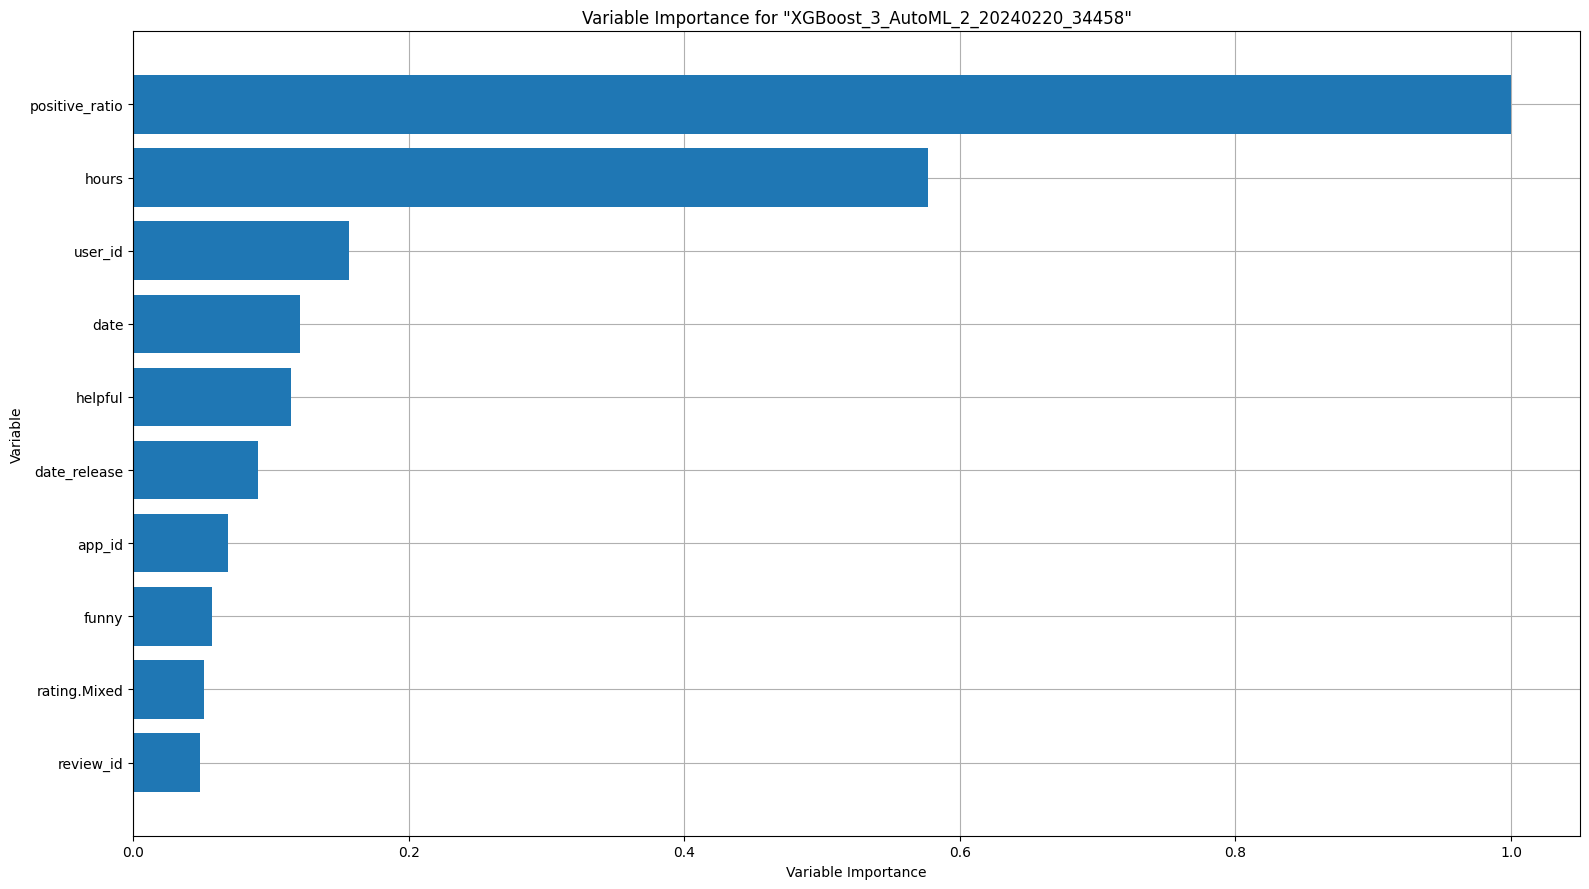

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

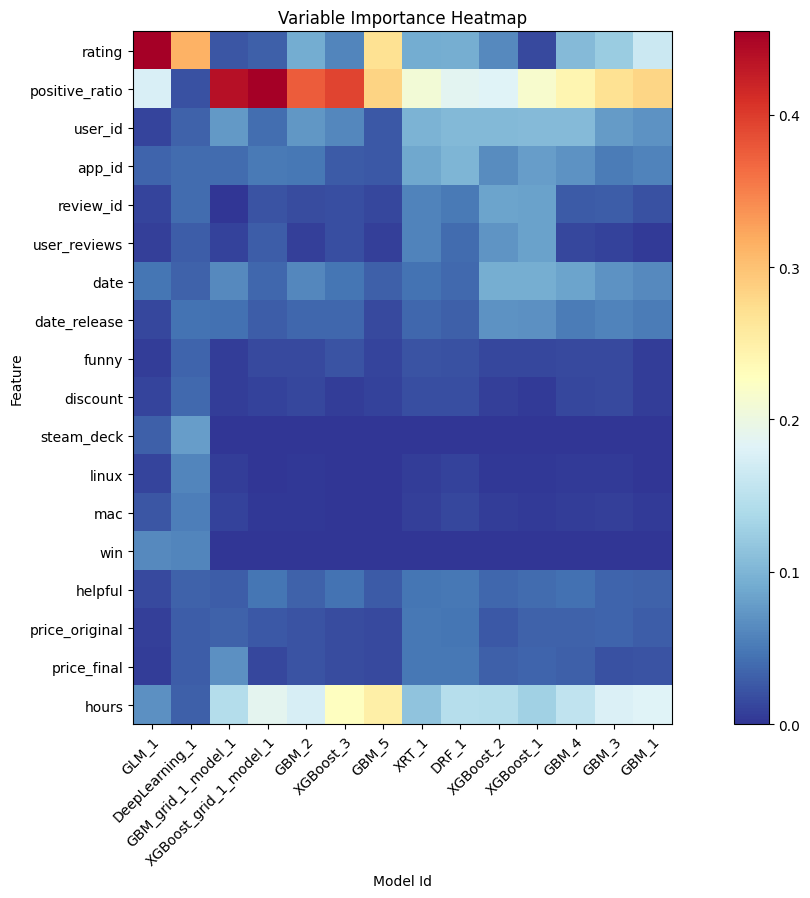

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

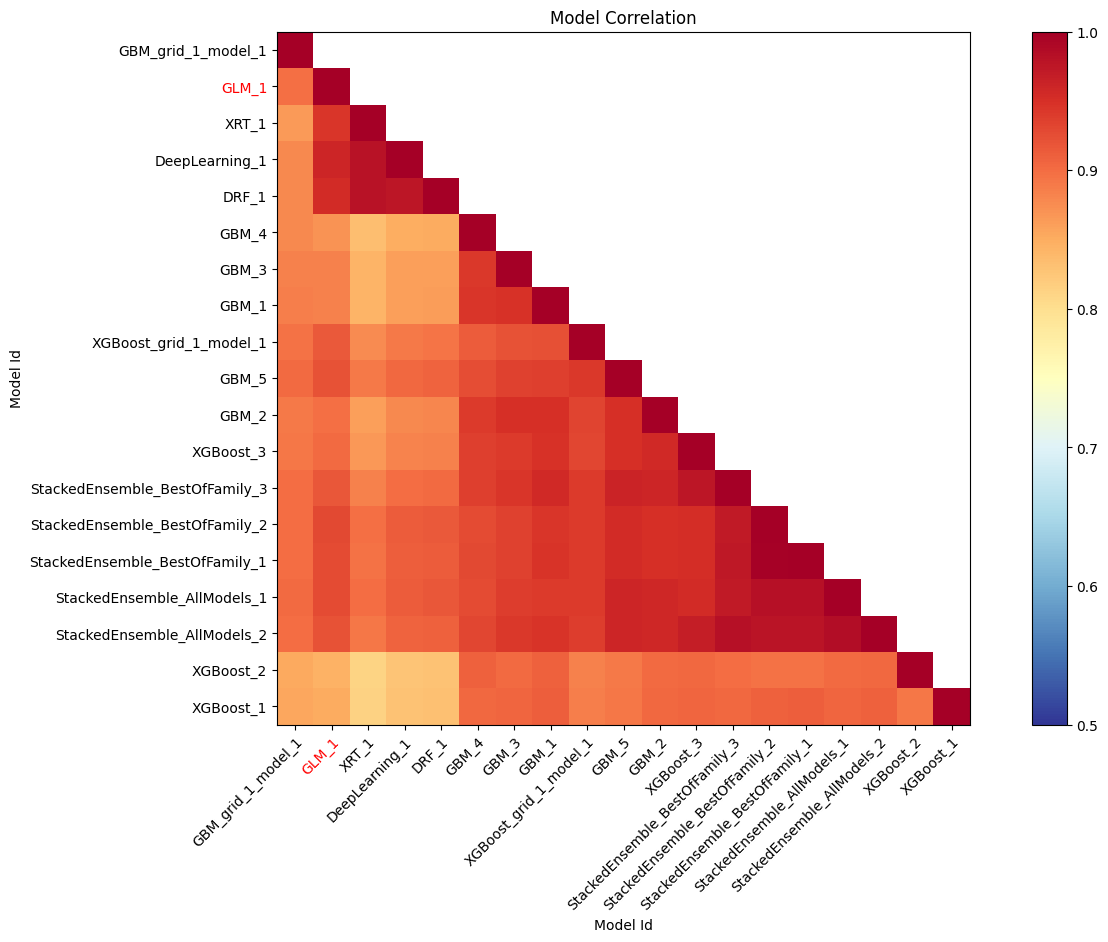

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

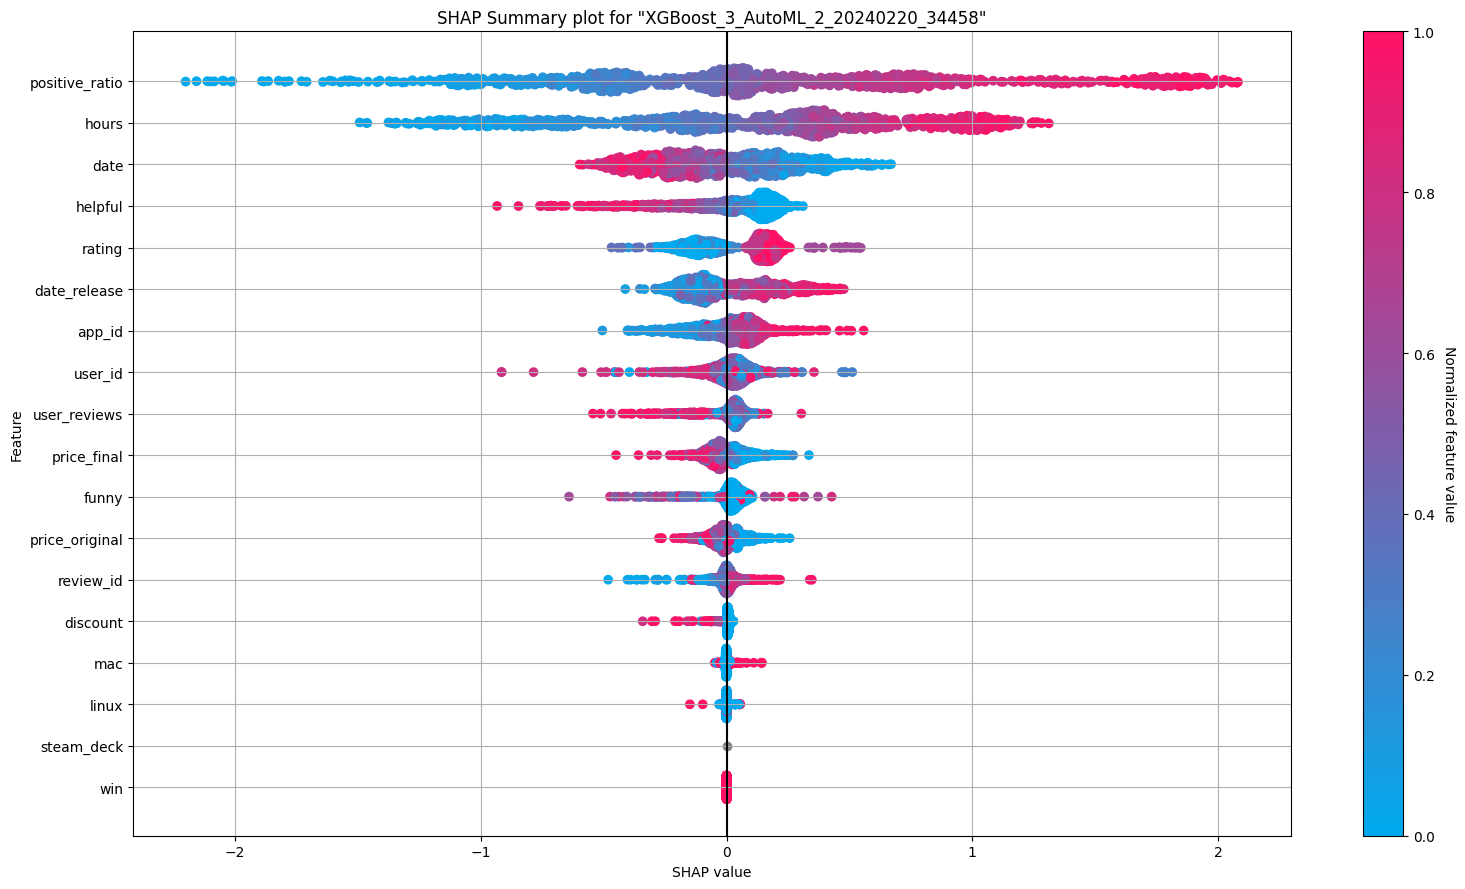

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

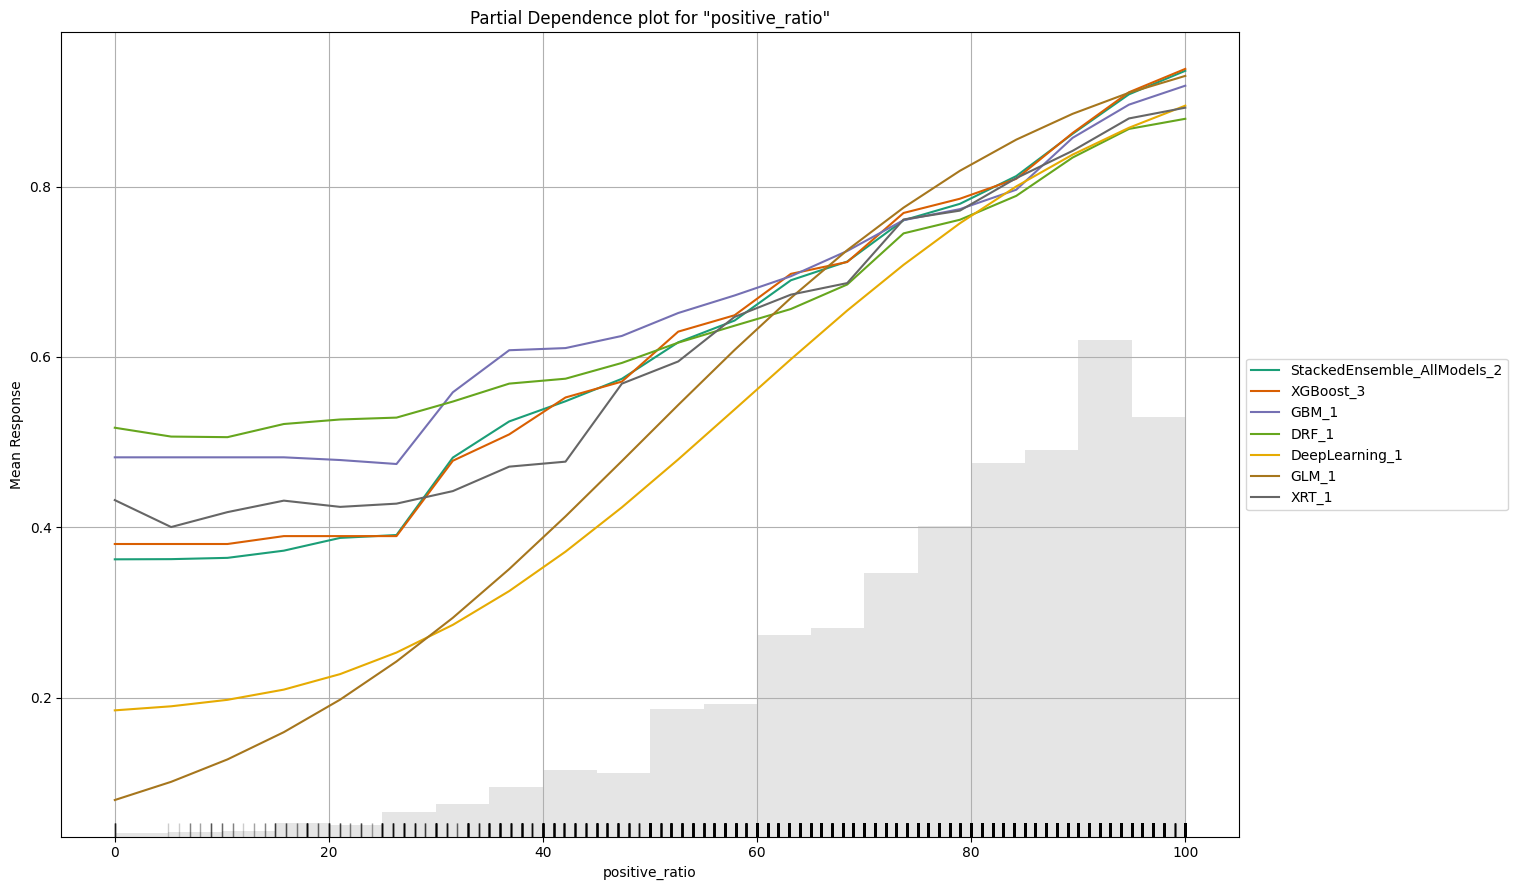

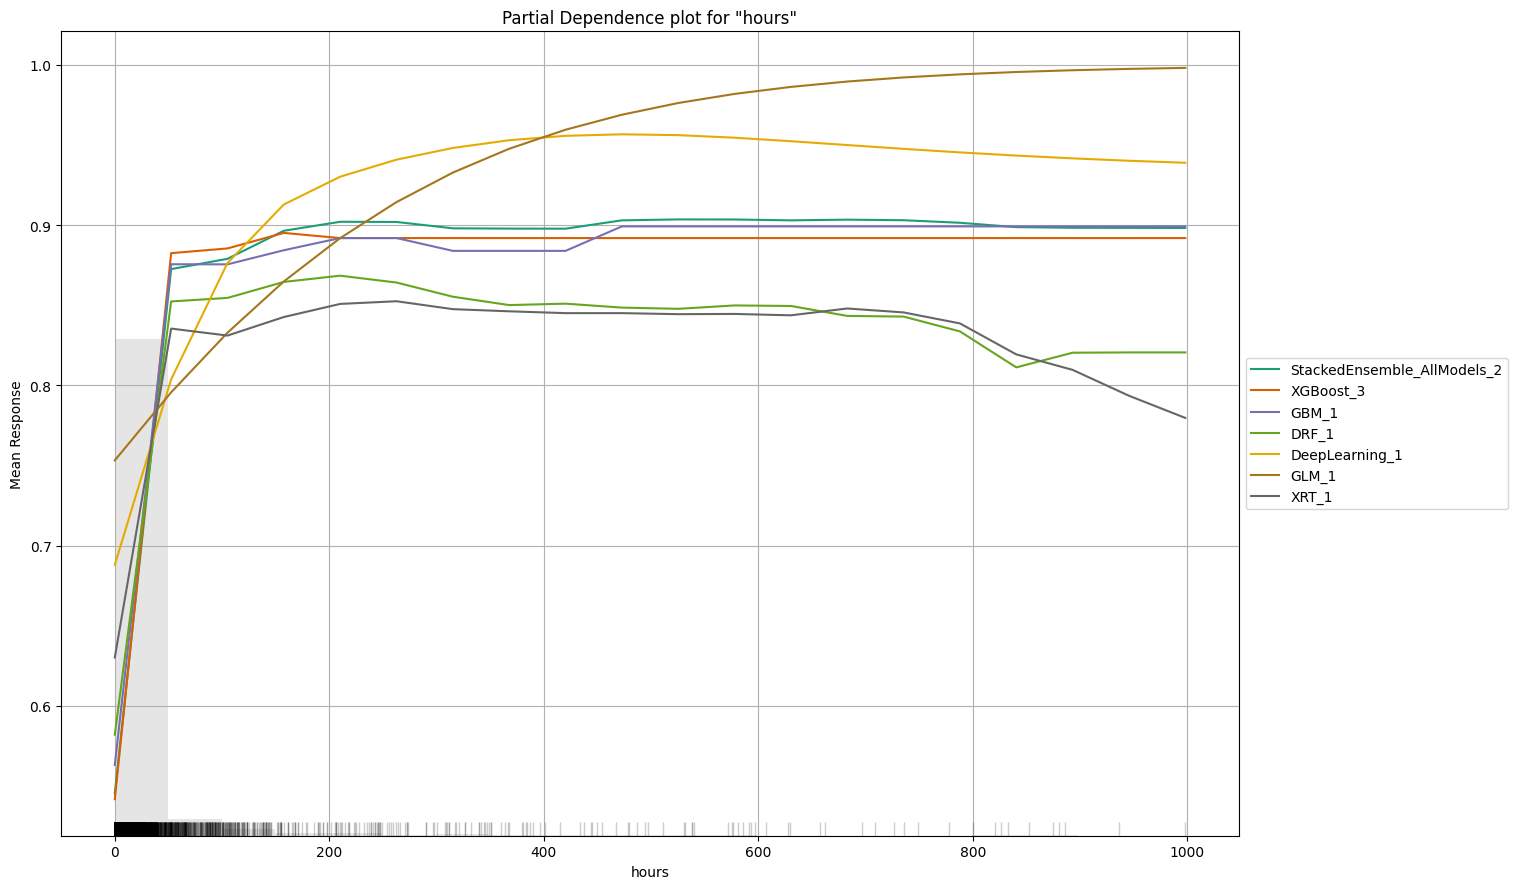

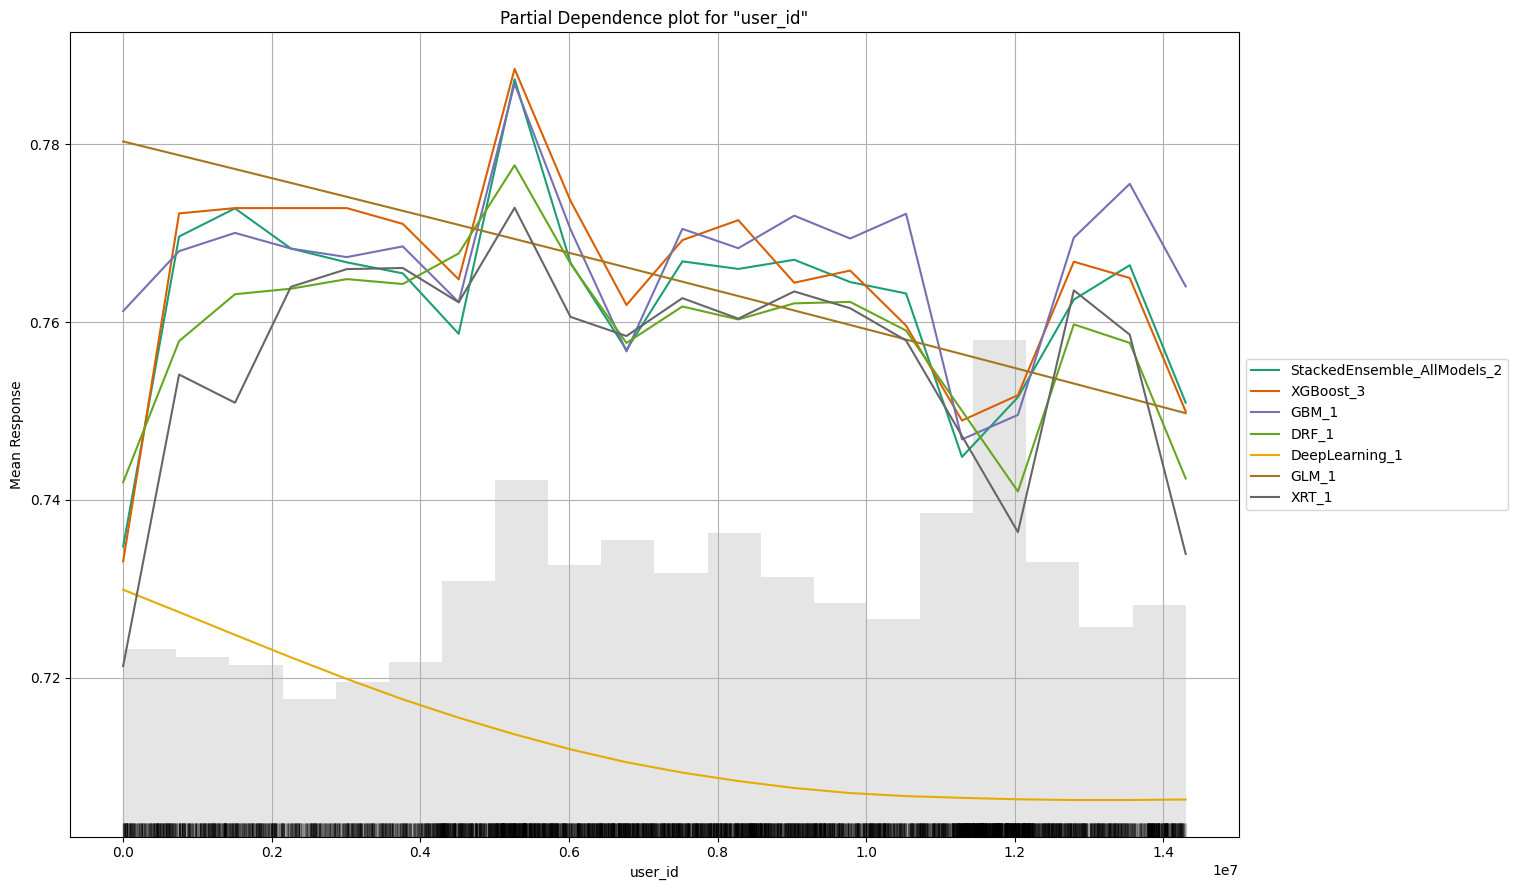

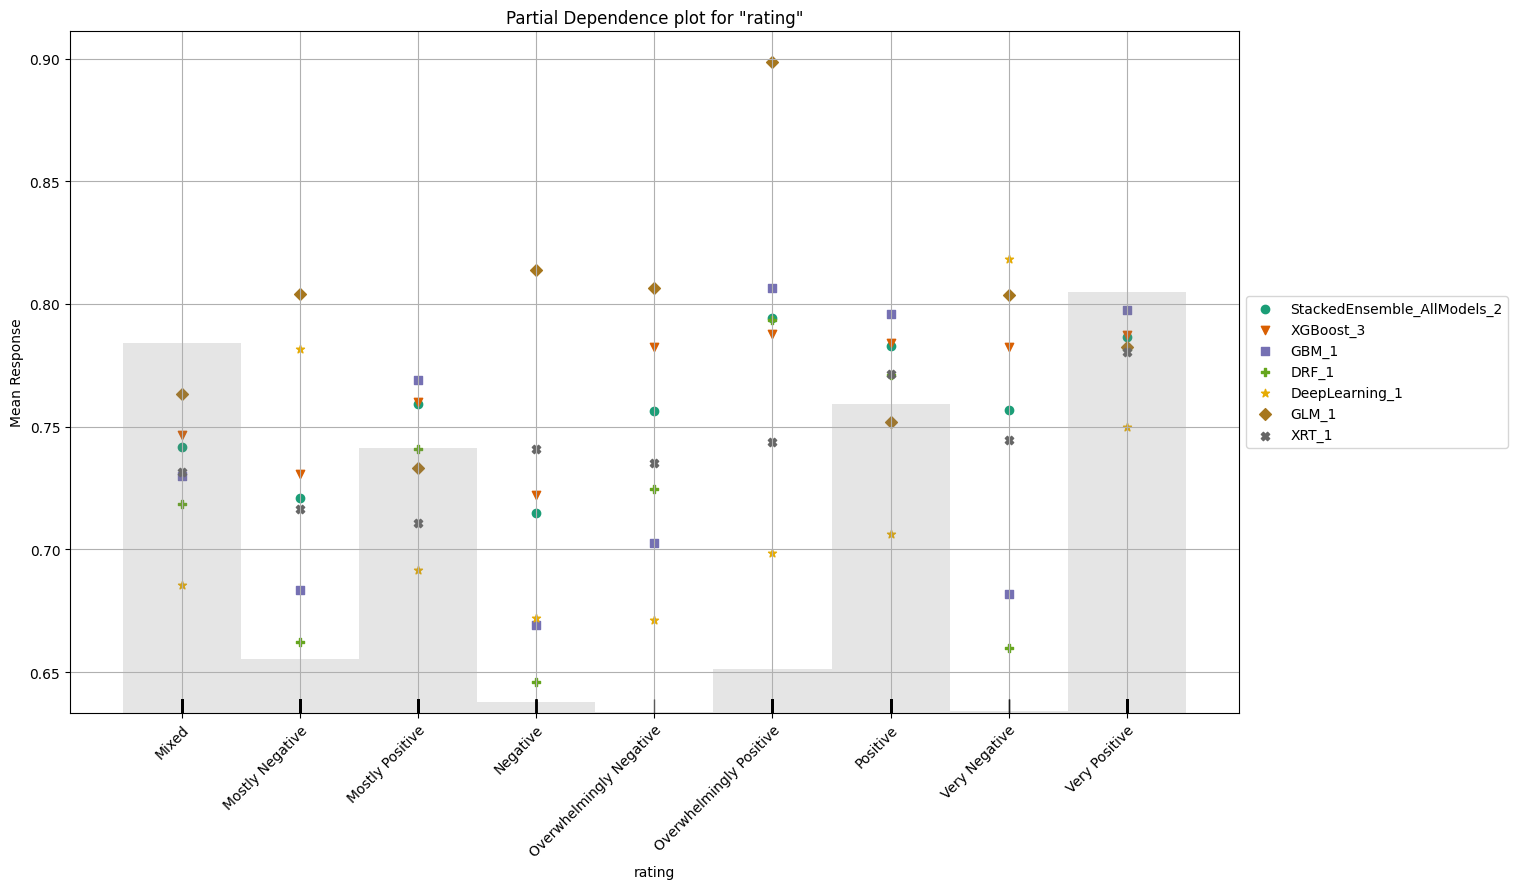

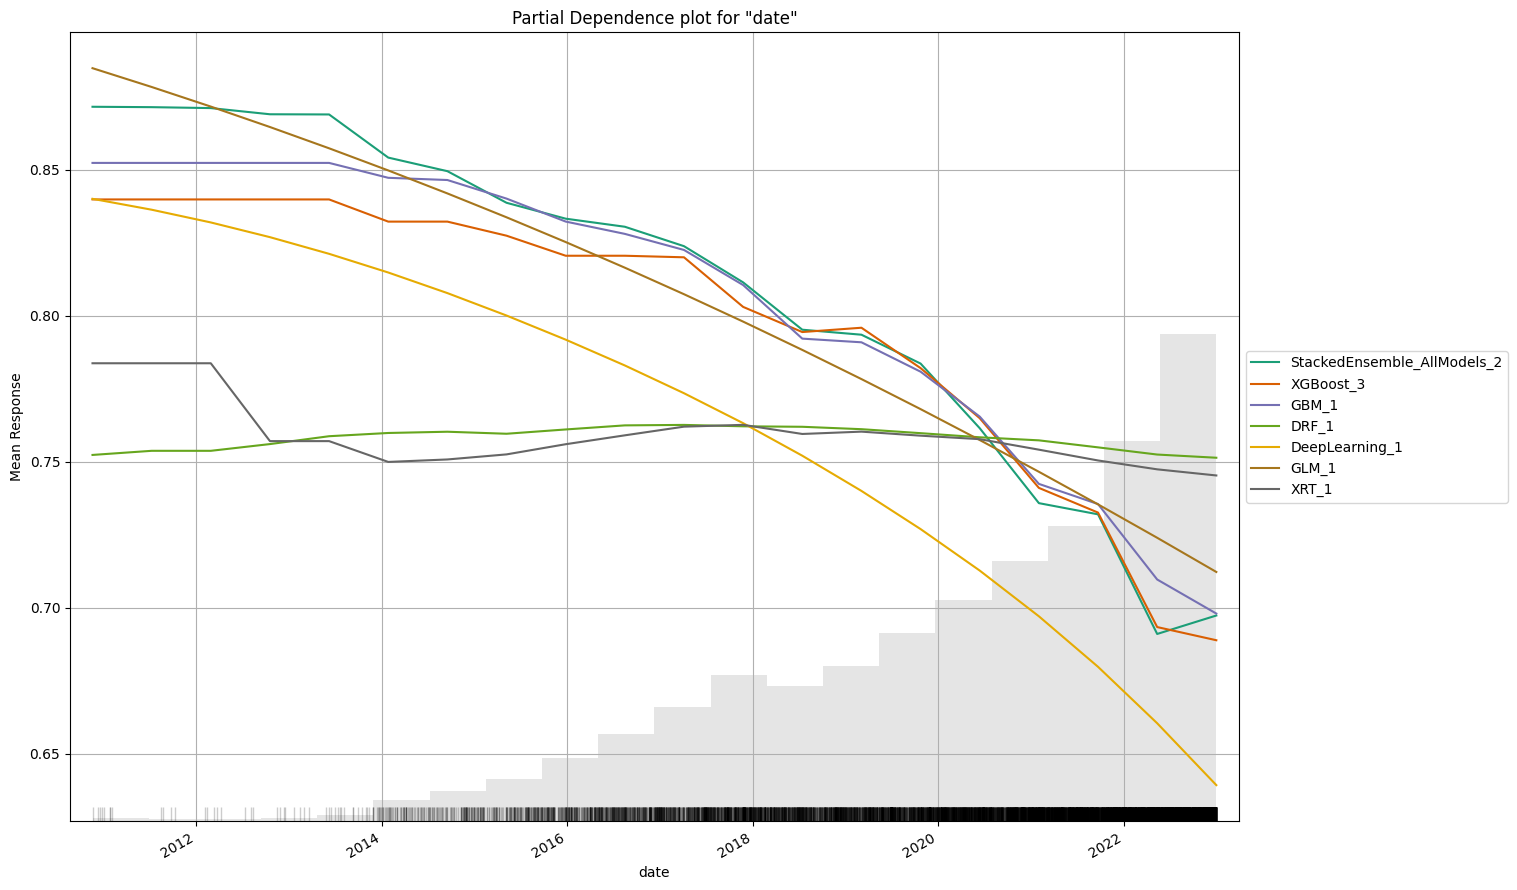

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240220_34458,0.815815,0.424988,0.929335,0.386841,0.369963,0.136872,3137,0.144869,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240220_34458,0.815793,0.424729,0.929388,0.370071,0.369778,0.136736,2547,0.138459,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_34458,0.811841,0.428276,0.927226,0.358284,0.371209,0.137796,1938,0.055008,StackedEnsemble
GBM_3_AutoML_2_20240220_34458,0.81171,0.429372,0.926034,0.366104,0.371774,0.138216,3552,0.018398,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34458,0.811486,0.428647,0.927506,0.370845,0.371618,0.1381,1228,0.026968,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_34458,0.811219,0.428971,0.926531,0.370915,0.371616,0.138098,1389,0.051772,StackedEnsemble
GBM_2_AutoML_2_20240220_34458,0.809397,0.431023,0.926827,0.362503,0.372917,0.139067,3279,0.02846,GBM
XGBoost_3_AutoML_2_20240220_34458,0.809205,0.430662,0.925999,0.349512,0.372336,0.138634,1620,0.004689,XGBoost
GBM_1_AutoML_2_20240220_34458,0.808319,0.431548,0.925717,0.36217,0.372803,0.138982,6924,0.022083,GBM
GBM_4_AutoML_2_20240220_34458,0.805985,0.4338,0.924559,0.36461,0.373641,0.139607,5109,0.018028,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_2_20240220_34458

,False,True,Error,Rate
False,543.0,1281.0,0.7023,(1281.0/1824.0)
True,220.0,5594.0,0.0378,(220.0/5814.0)
Total,763.0,6875.0,0.1965,(1501.0/7638.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

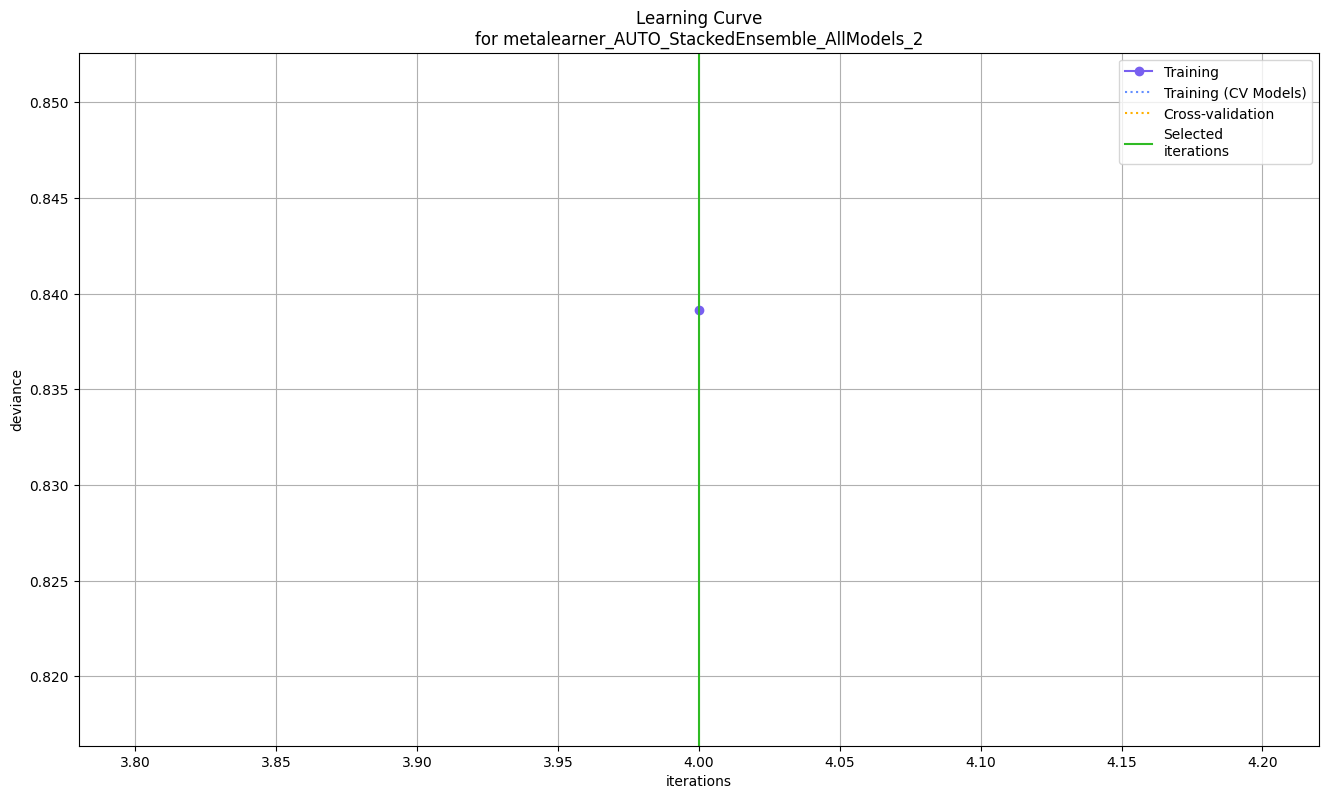

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

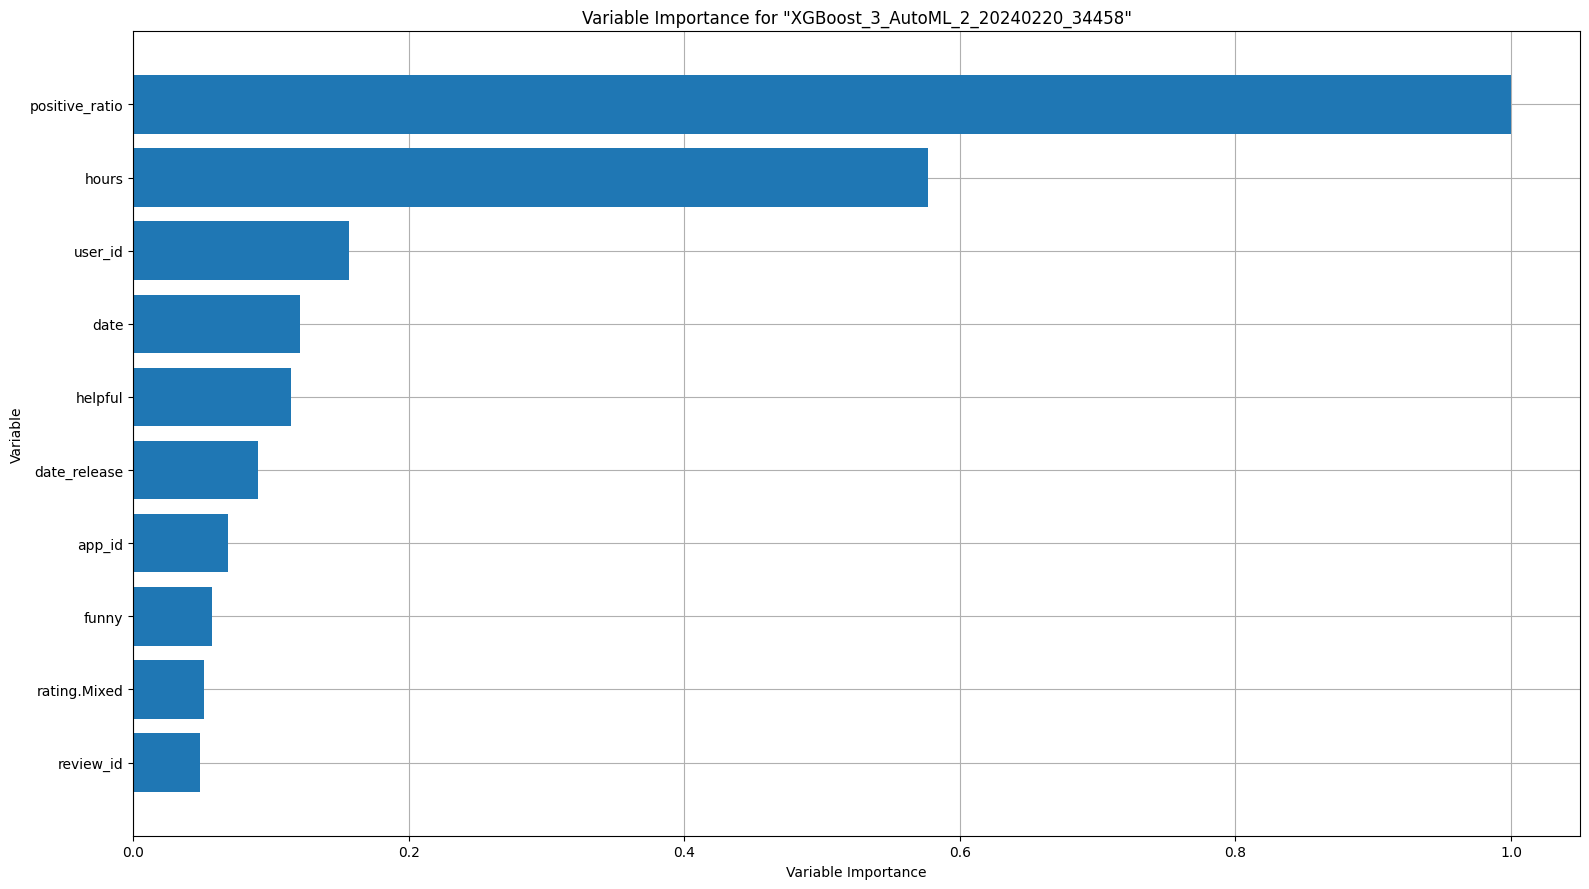

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

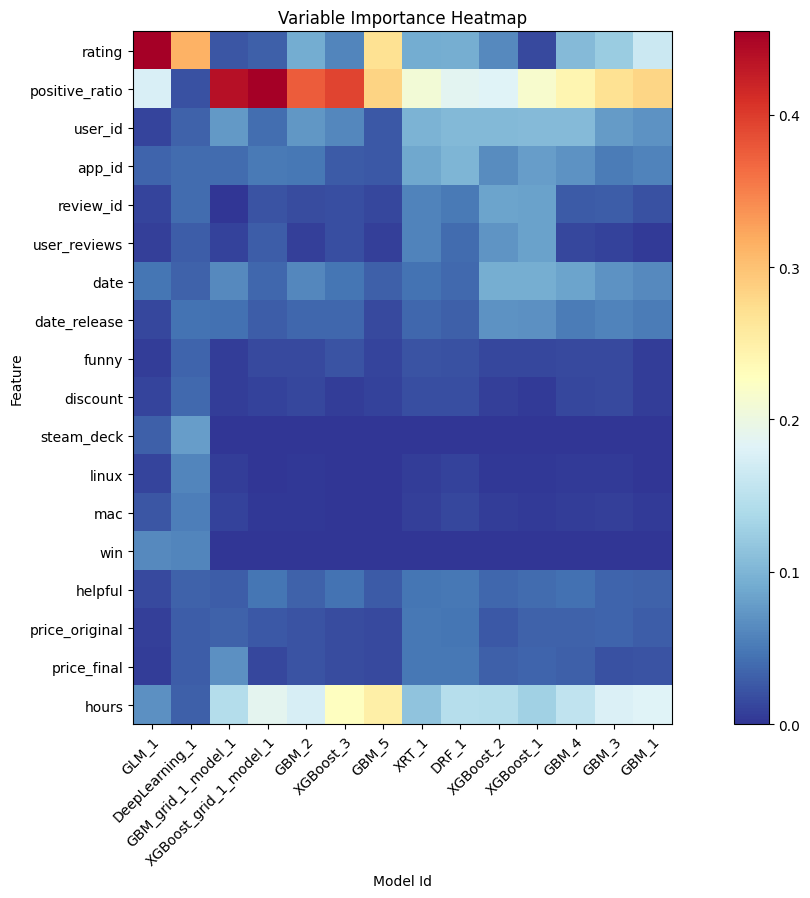

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

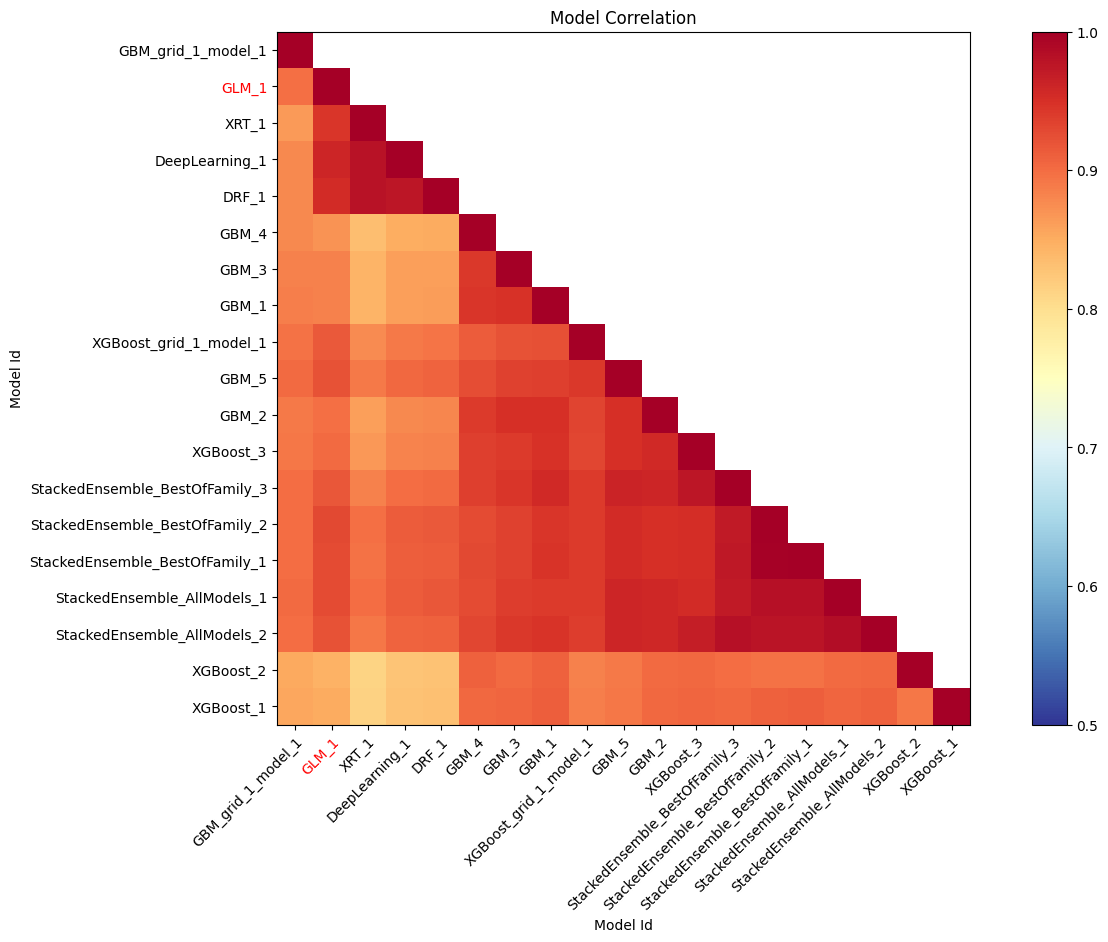

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

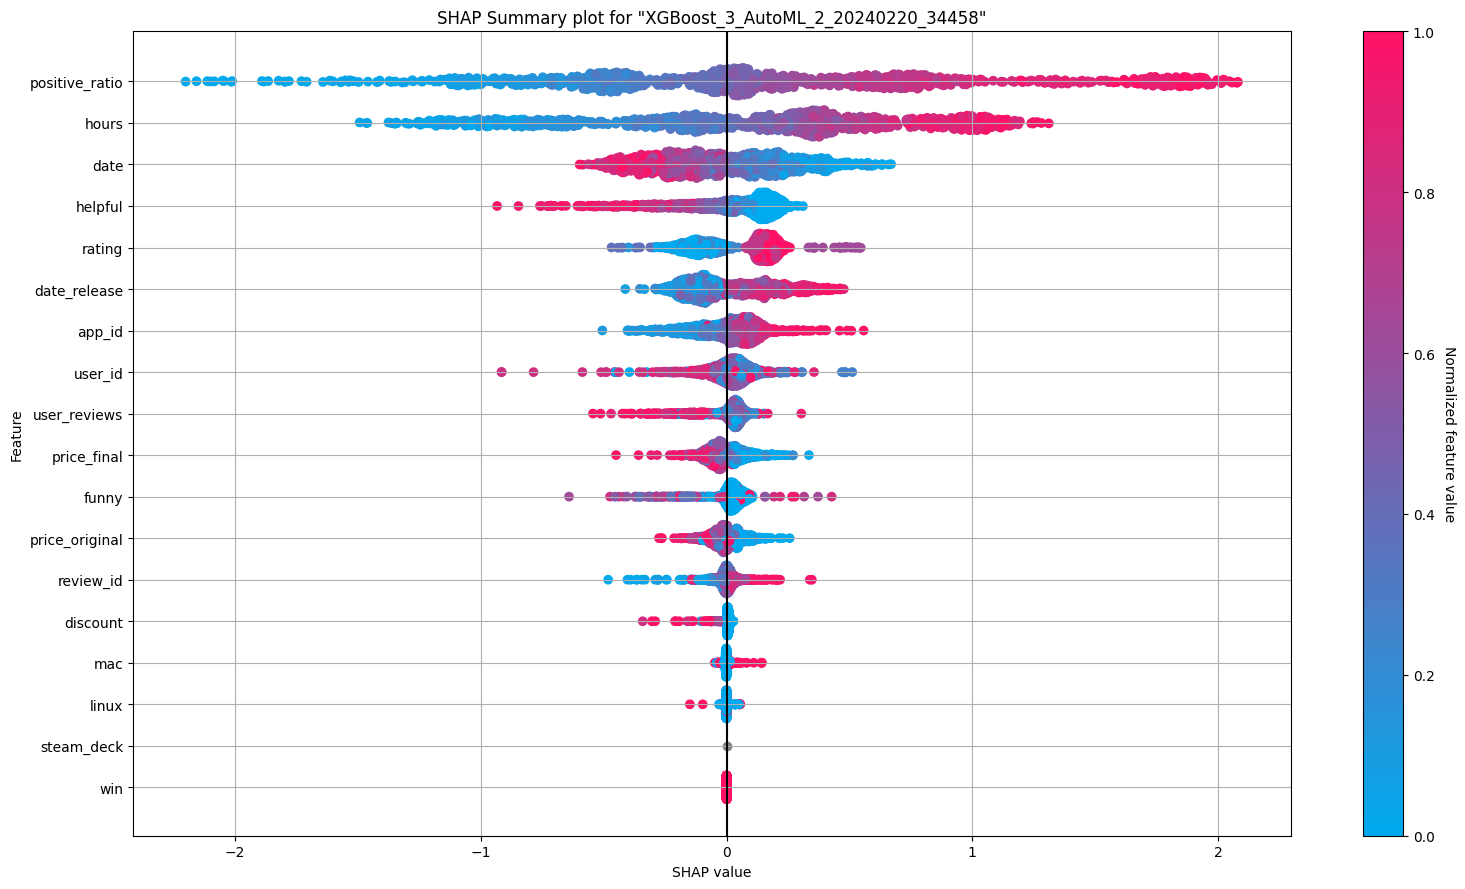

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

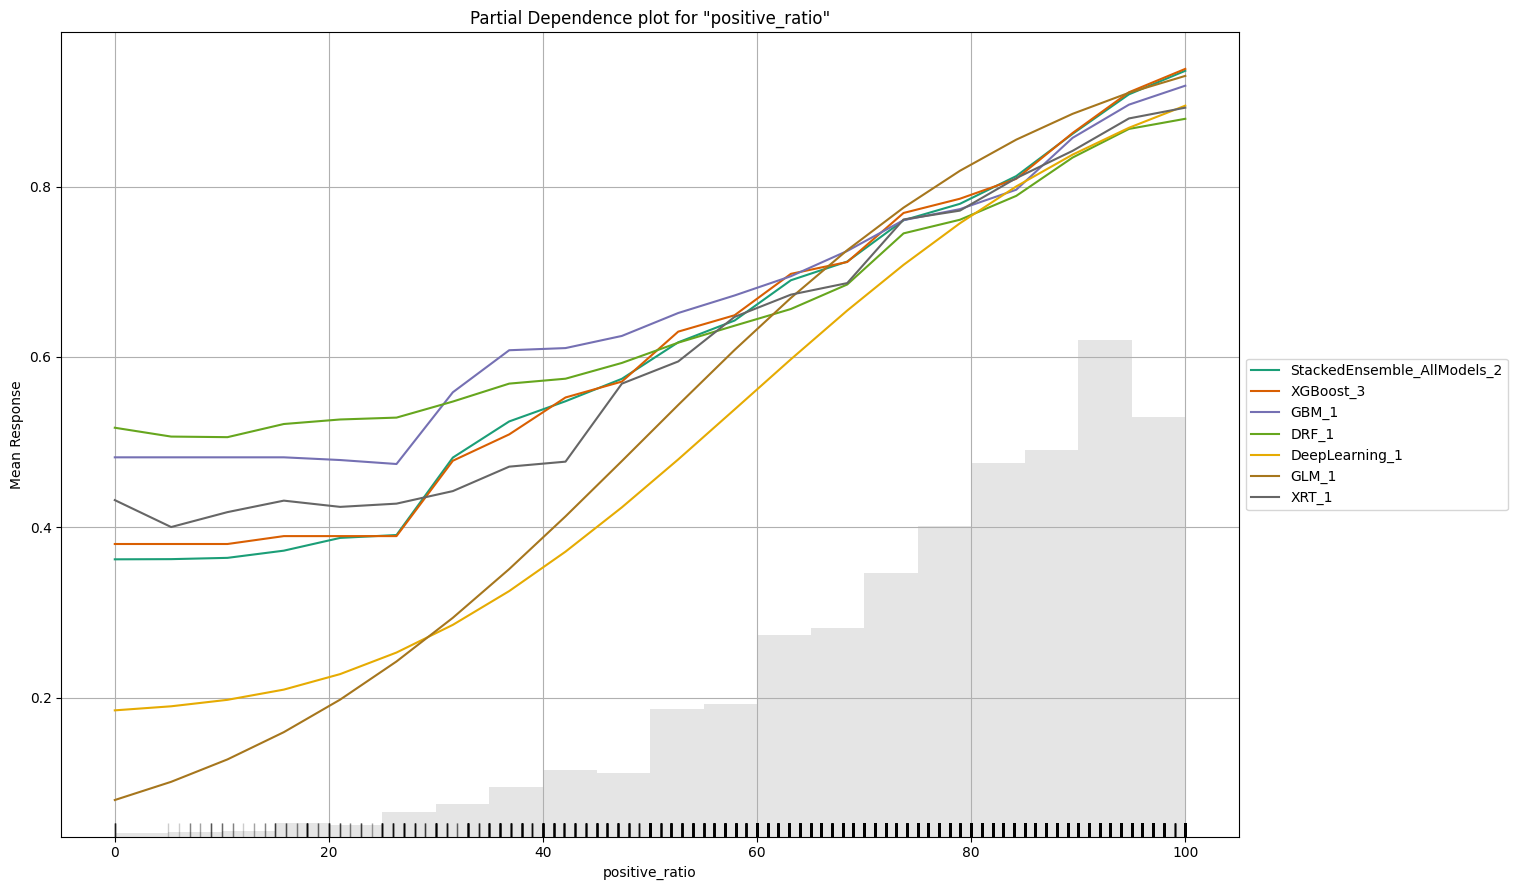

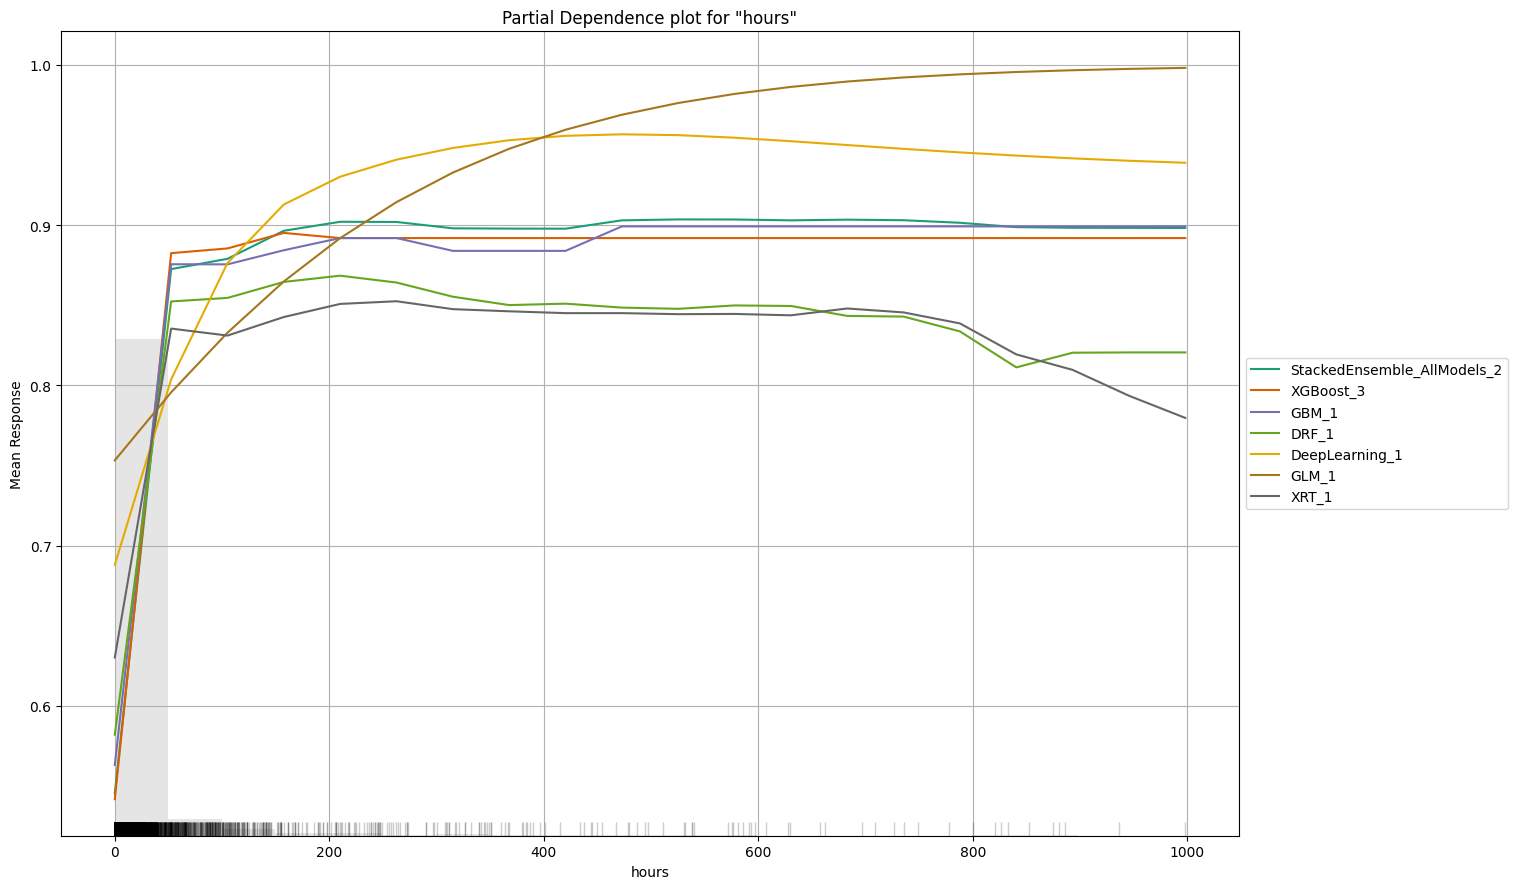

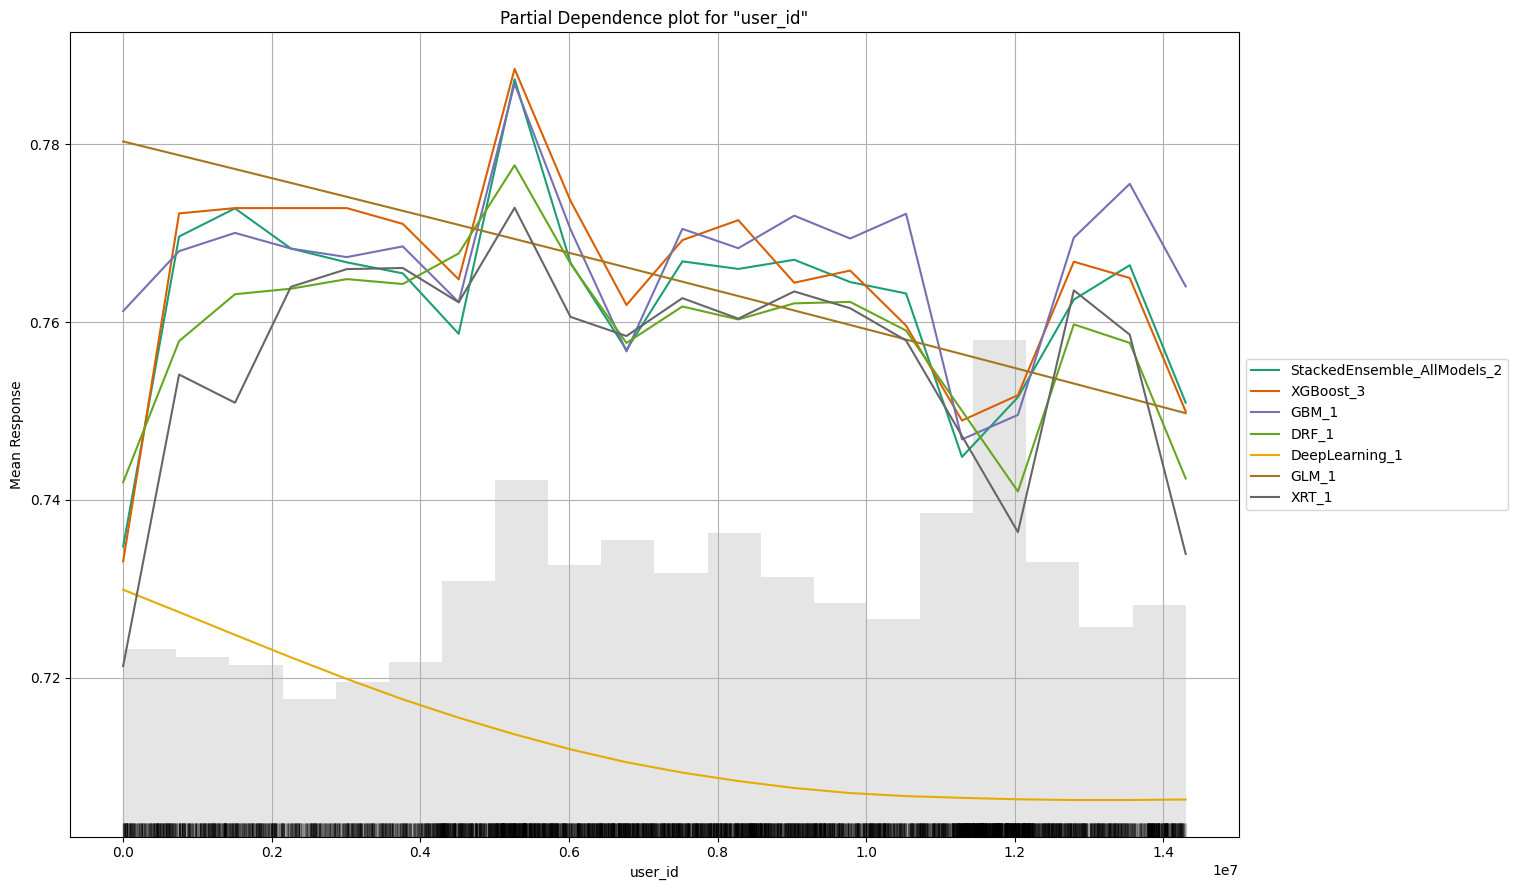

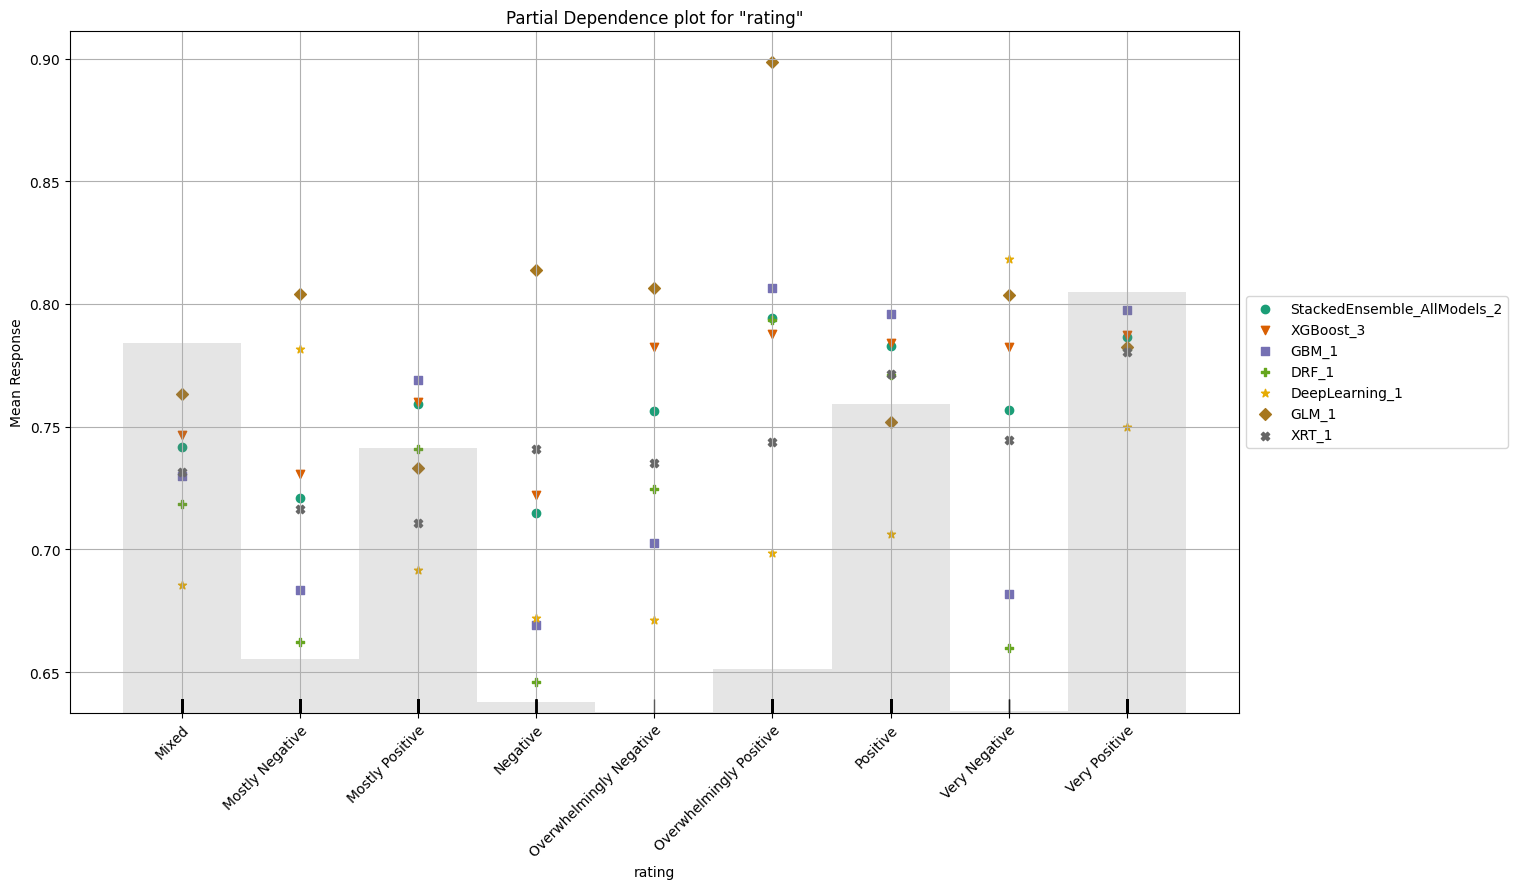

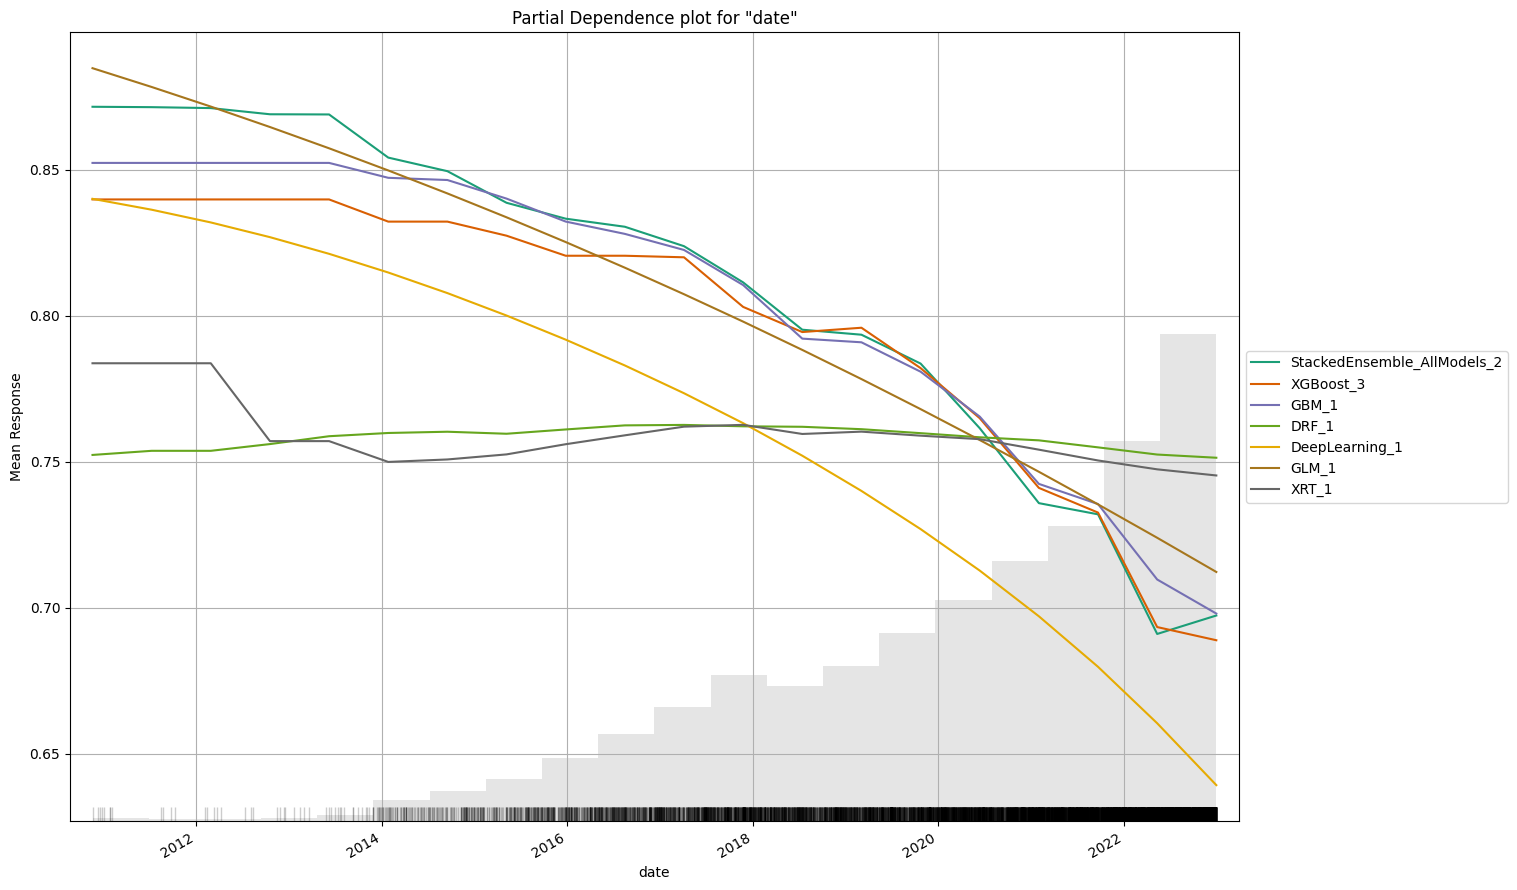

In [55]:
aml.explain(df_test)

In [56]:
aml.leader.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13673609229469508
RMSE: 0.36977843676273914
LogLoss: 0.4247289254553825
AUC: 0.8157928212451494
AUCPR: 0.9293875639274225
Gini: 0.6315856424902988
Null degrees of freedom: 7637
Residual degrees of freedom: 7627
Null deviance: 8398.303546496145
Residual deviance: 6488.159065256422
AIC: 6510.159065256422

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4188272811482817
       False    True    Error    Rate
-----  -------  ------  -------  ---------------
False  543      1281    0.7023   (1281.0/1824.0)
True   220      5594    0.0378   (220.0/5814.0)
Total  763      6875    0.1965   (1501.0/7638.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.418827     0.881709  300
max f2                       0.127657     0.942243  385
max f0point5                 0.678279     0.866152  196
max accuracy                 0.541586     0.80453   256
max precision                0.993017     1         0
max recall                   0.058956     1         397
max specificity              0.993017     1         0
max absolute_mcc             0.678279     0.432105  196
max min_per_class_accuracy   0.766696     0.737939  153
max mean_per_class_accuracy  0.797284     0.742072  136
max tns                      0.993017     1824      0
max fns                      0.993017     5804      0
max fps                      0.0473454    1824      399
max tps                      0.058956     5814      397
max tnr                      0.993017     1         0
max fnr                      0.993017     0.99828   0
max fpr                      0.0473454    1         399
max tpr                      0.058956     1         397

Gains/Lift Table: Avg response rate: 76.12 %, avg score: 76.22 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100812                   0.987968           1.31373   1.31373            1                0.990146  1                           0.990146            0.0132439       0.0132439                  31.3725   31.3725            0.0132439
2        0.0200314                   0.985728           1.31373   1.31373            1                0.987019  1                           0.988593            0.0130719       0.0263158                  31.3725   31.3725            0.0263158
3        0.0301126                   0.983487           1.31373   1.31373            1                0.984641  1                           0.98727             0.0132439       0.0395597                  31.3725   31.3725            0.0395597
4        0.0400628                   0.981063           1.26187   1.30085            0.960526         0.982249  0.990196                    0.986023            0.0125559       0.0521156                  26.1868   30.0846            0.0504708
5        0.0500131                   0.97834            1.27915   1.29653            0.973684         0.97973   0.986911                    0.984771            0.0127279       0.0648435                  27.9154   29.653             0.0621023
6        0.100026                    0.96632            1.28621   1.29137            0.979058         0.97239   0.982984                    0.97858             0.0643275       0.129171                   28.6213   29.1372            0.122044
7        0.150039                    0.95445            1.27933   1.28736            0.973822         0.96051   0.97

## Leaderboard

In [47]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_2_20240220_34458,0.814292,0.419956,0.929274,0.372352,0.36651,0.13433
StackedEnsemble_AllModels_1_AutoML_2_20240220_34458,0.812633,0.421276,0.928552,0.369277,0.36707,0.13474
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_34458,0.812409,0.421947,0.928424,0.361644,0.367541,0.135086
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34458,0.810549,0.423426,0.927623,0.375887,0.368189,0.135563
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_34458,0.810458,0.42342,0.92747,0.376292,0.368195,0.135567
XGBoost_3_AutoML_2_20240220_34458,0.810061,0.424259,0.927527,0.385498,0.368759,0.135983
GBM_1_AutoML_2_20240220_34458,0.807607,0.426116,0.92586,0.373287,0.369348,0.136418
GBM_2_AutoML_2_20240220_34458,0.807572,0.425903,0.926443,0.384264,0.369417,0.136469
GBM_3_AutoML_2_20240220_34458,0.805728,0.427357,0.925518,0.383718,0.369987,0.136891
GBM_4_AutoML_2_20240220_34458,0.801786,0.431716,0.923448,0.386295,0.371996,0.138381


## VIF

In [17]:
df.drop(['title','date_release', 'date'], inplace=True, axis=1)

In [18]:
ratings_map = {
    "Overwhelmingly Positive" : 9,
    "Mostly Positive" : 8,
    "Very Positive" : 7,
    "Positive" : 6,
    "Mixed" : 5,
    "Negative" : 4,
    "Very Negative" : 3,
    "Mostly Negative" : 2,
    "Overwhelmingly Negative" : 1
}
df['rating'] = df['rating'].map(ratings_map)
df['win'] = df['win'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)
df['is_recommended'] = df['is_recommended'].astype(int)
df['steam_deck'] = df['steam_deck'].astype(int)

In [19]:
from h2o.estimators import H2ORandomForestEstimator

In [20]:
rf = H2ORandomForestEstimator(seed=42)
rf.train(x=X, y=target, training_frame=df_train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1708395837979_1083


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          2.32902e+06            20           20           20            3070          4256          3691.4

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14775710911796044
RMSE: 0.3843918692141659
LogLoss: 0.4920162766757192
Mean Per-Class Error: 0.40889691479241985
AUC: 0.7734800069978509
AUCPR: 0.9093167956470717
Gini: 0.5469600139957018

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4110382752541378
       False    True    Error    Rate
-----  -------  ------  -------  ----------------
False  1536     5557    0.7834   (5557.0/7093.0)
True   793      22296   0.0343   (793.0/23089.0)
Total  2329     27853   0.2104   (6350.0/30182.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.411038     0.875348  305
max f2                       0.136684     0.942408  380
max f0point5                 0.647789     0.850634  204
max accuracy                 0.476435     0.791697  280
max precision                0.998639     0.97471   1
max recall                   0            1         399
max specificity              0.999949     0.995207  0
max absolute_mcc             0.647789     0.36362   204
max min_per_class_accuracy   0.74877      0.703842  153
max mean_per_class_accuracy  0.742999     0.704878  156
max tns                      0.999949     7059      0
max fns                      0.999949     21889     0
max fps                      0            7093      399
max tps                      0            23089     399
max tnr                      0.999949     0.995207  0
max fnr                      0.999949     0.948027  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 76.50 %, avg score: 75.92 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0367769                   1                  1.2707    1.2707             0.972072         1         0.972072                    1                   0.0467322       0.0467322                  27.0695   27.0695            0.0423617
2        0.0400239                   0.999398           1.28052   1.27149            0.979592         0.999615  0.972682                    0.999969            0.00415782      0.05089                    28.0525   27.1493            0.0462376
3        0.050063                    0.997843           1.28563   1.27433            0.983498         0.998599  0.974851                    0.999694            0.0129066       0.0637966                  28.5632   27.4328            0.0584392
4        0.100027                    0.98701            1.26473   1.26953            0.967507         0.9933    0.971183                    0.9965              0.0631903       0.126987                   26.4727   26.9532            0.114721
5        0.150023                    0.960944           1.21105   1.25004            0.926441         0.975957  0.956272 

In [21]:
predictions = rf.predict(df_test)

performance = rf.model_performance(test_data=df_test)

print(performance)

class_counts = df_train[target].table()
print("Class distribution:", class_counts)

vif_data = pd.DataFrame()
vif_data["Feature"] = X
vif_data["VIF"] = [rf.varimp()[i][3] for i in range(len(X))]
print("VIF values:\n", vif_data)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1391624627030954
RMSE: 0.37304485347354066
LogLoss: 0.43659756782350345
Mean Per-Class Error: 0.37804661092332326
AUC: 0.7983734465143467
AUCPR: 0.9194545639335282
Gini: 0.5967468930286934

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4724379443377257
       False    True    Error    Rate
-----  -------  ------  -------  ---------------
False  490      1225    0.7143   (1225.0/1715.0)
True   235      5386    0.0418   (235.0/5621.0)
Total  725      6611    0.199    (1460.0/7336.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.472438     0.880641  296
max f2                       0.258301     0.943651  362
max f0point5                 0.659509     0.864225  212


## Regularization

In [22]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Binary Classification with Elastic Net Regularization
binary_glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True, nfolds=5, remove_collinear_columns=True
)  # Elastic Net Regularization

# Binary Classification with RIDGE Regularization
binary_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=5, remove_collinear_columns=True
)  # RIDGE Regularization

# Binary Classification with LASSO Regularization
binary_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5, remove_collinear_columns=True
)  # LASSO Regularization

# Binary Classification with Lambda Search
binary_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_search=True, remove_collinear_columns=True
)  # Lambda Search

In [23]:
df_train['is_recommended'] = df_train['is_recommended'].asnumeric()

In [24]:
binary_glm.train(x=X, y=target, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395837979_1098


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              25                            25                             5                       py_8_sid_945a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15000307236338453
RMSE: 0.3873023010045054
LogLoss: 0.46381385599630154
AUC: 0.7636753615553816
AUCPR: 0.9042315723193554
Gini: 0.5273507231107633
Null degrees of freedom: 30181
Residual degrees of freedom: 30156
Null deviance: 32913.87329263456
Residual deviance: 27997.659603360742
AIC: 28049.659603360742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43990322076731586
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      1374  5719   0.8063   (5719.0/7093.0)
1      751   22338  0.0325   (751.0/23089.0)
Total  2125  28057  0.2144   (6470.0/30182.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.439903     0.873499  311
max f2                       0.191406     0.942483  380
max f0point5                 0.685991     0.845109  204
max accuracy                 0.477216     0.78623   297
max precision                0.928644     0.961883  33
max recall                   0.00537046   1         399
max specificity              0.998144     0.999718  0
max absolute_mcc             0.730892     0.347026  177
max min_per_class_accuracy   0.76268      0.694833  157
max mean_per_class_accuracy  0.757043     0.696685  161
max tns                      0.998144     7091      0
max fns                      0.998144     23041     0
max fps                      0.00537046   7093      399
max tps                      0.00537046   23089     399
max tnr                      0.998144     0.999718  0
max fnr                      0.998144     0.997921  0
max fpr                      0.00537046   1         399
max tpr                      0.00537046   1         399

Gains/Lift Table: Avg response rate: 76.50 %, avg score:  7.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010006                    0.274916           1.06914   1.06914            0.817881         0.576229   0.817881                    0.576229            0.0106977       0.0106977                  6.91359   6.91359            0.00294361
2        0.0200119                   0.21568            1.16869   1.11891            0.89404          0.233348   0.85596                     0.404789            0.0116939       0.0223916                  16.8691   11.8913            0.010126
3        0.0300179                   0.210501           1.24228   1.16003            0.950331         0.212495   0.887417                    0.340691            0.0124302       0.0348218                  24.2275   16.0034            0.0204414
4        0.0400239                   0.203023           1.2466    1.18168            0.953642         0.208749   0.903974                    0.307705            0.0124735       0.0472952                  24.6604   18.1676            0.0309411
5        0.0500298                   

In [25]:
binary_glm_regularization_ridge.train(x=X, y=target, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395837979_1116


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 1.659E-4 )  30                            25                             3                       py_8_sid_945a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15015164856511726
RMSE: 0.38749406261918035
LogLoss: 0.4639557822159891
AUC: 0.7631231032234256
AUCPR: 0.9043835341041035
Gini: 0.5262462064468512
Null degrees of freedom: 30181
Residual degrees of freedom: 30156
Null deviance: 32913.87329263456
Residual deviance: 28006.226837685965
AIC: 28058.226837685965

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43700582730215465
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      1321  5772   0.8138   (5772.0/7093.0)
1      714   22375  0.0309   (714.0/23089.0)
Total  2035  28147  0.2149   (6486.0/30182.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.437006     0.873409  313
max f2                       0.19961      0.942449  380
max f0point5                 0.682088     0.844776  205
max accuracy                 0.50452      0.786164  288
max precision                0.995017     0.977778  1
max recall                   0.0108588    1         399
max specificity              0.997339     0.999859  0
max absolute_mcc             0.732682     0.345679  174
max min_per_class_accuracy   0.761519     0.695309  156
max mean_per_class_accuracy  0.755459     0.69598   160
max tns                      0.997339     7092      0
max fns                      0.997339     23070     0
max fps                      0.0108588    7093      399
max tps                      0.0108588    23089     399
max tnr                      0.997339     0.999859  0
max fnr                      0.997339     0.999177  0
max fpr                      0.0108588    1         399
max tpr                      0.0108588    1         399

Gains/Lift Table: Avg response rate: 76.50 %, avg score: 76.39 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010006                    0.968879           1.24228   1.24228            0.950331         0.980978  0.950331                    0.980978            0.0124302       0.0124302                  24.2275   24.2275            0.0103154
2        0.0200119                   0.960859           1.25959   1.25093            0.963576         0.964626  0.956954                    0.972802            0.0126034       0.0250336                  25.9589   25.0932            0.021368
3        0.0300179                   0.951607           1.24228   1.24805            0.950331         0.956369  0.954746                    0.967324            0.0124302       0.0374637                  24.2275   24.8047            0.0316834
4        0.0400239                   0.942615           1.27257   1.25418            0.97351          0.946384  0.959437                    0.962089            0.0127333       0.0501971                  27.2575   25.4179            0.0432888
5        0.0

In [26]:
binary_glm_regularization_lasso.train(x=X, y=target, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395837979_1134


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.659E-4 )  30                            23                             6                       py_8_sid_945a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15000532424627444
RMSE: 0.3873052081321325
LogLoss: 0.46383926653067087
AUC: 0.7636508729847237
AUCPR: 0.9041588933918651
Gini: 0.5273017459694473
Null degrees of freedom: 30181
Residual degrees of freedom: 30158
Null deviance: 32913.87329263456
Residual deviance: 27999.193484857416
AIC: 28047.193484857416

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43979967277909443
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      1375  5718   0.8061   (5718.0/7093.0)
1      751   22338  0.0325   (751.0/23089.0)
Total  2126  28056  0.2143   (6469.0/30182.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.4398       0.873516  308
max f2                       0.191452     0.942483  381
max f0point5                 0.685685     0.84521   200
max accuracy                 0.466789     0.786197  297
max precision                0.936023     0.962218  26
max recall                   0.00538217   1         399
max specificity              0.99812      0.999718  0
max absolute_mcc             0.7289       0.347046  175
max min_per_class_accuracy   0.762294     0.695266  154
max mean_per_class_accuracy  0.757115     0.696755  157
max tns                      0.99812      7091      0
max fns                      0.99812      23042     0
max fps                      0.00538217   7093      399
max tps                      0.00538217   23089     399
max tnr                      0.99812      0.999718  0
max fnr                      0.99812      0.997964  0
max fpr                      0.00538217   1         399
max tpr                      0.00538217   1         399

Gains/Lift Table: Avg response rate: 76.50 %, avg score: 76.50 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010006                    0.977896           1.24228   1.24228            0.950331         0.987735  0.950331                    0.987735            0.0124302       0.0124302                  24.2275   24.2275            0.0103154
2        0.0200119                   0.971861           1.26392   1.2531             0.966887         0.974647  0.958609                    0.981191            0.0126467       0.0250769                  26.3918   25.3096            0.0215523
3        0.0300179                   0.96297            1.23362   1.2466             0.943709         0.967815  0.953642                    0.976732            0.0123435       0.0374204                  23.3618   24.6604            0.0314991
4        0.0400239                   0.94823            1.25959   1.24985            0.963576         0.956072  0.956126                    0.971567            0.0126034       0.0500238                  25.9589   24.985             0.0425517
5        0.05

In [27]:
binary_glm_regularization_lambda_search.train(x=X, y=target, training_frame=df_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: remove_collinear_columns should only be used with no regularization, i.e. lambda=0.0.  It is used improperly here with lambda_search.  Please disable lambda_search and set lambda=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708395837979_1152


GLM Model: summary
    family    link    regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.03904 )  nlambda = 100, lambda.max = 0.3318, lambda.min = 0.03904, lambda.1se = -1.0  30                            2                              17                      py_8_sid_945a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.15333758638016207
RMSE: 0.3915834347621999
LogLoss: 0.47436123106209255
AUC: 0.7555125891372828
AUCPR: 0.903779891363565
Gini: 0.5110251782745656
Null degrees of freedom: 30181
Residual degrees of freedom: 30179
Null deviance: 32913.87329263456
Residual deviance: 28634.341351832154
AIC: 28640.341351832154

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4597956190065172
       0     1      Error    Rate
-----  ----  -----  -------  ----------------
0      1006  6087   0.8582   (6087.0/7093.0)
1      477   22612  0.0207   (477.0/23089.0)
Total  1483  28699  0.2175   (6564.0/30182.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.459796     0.873252  340
max f2                       0.239123     0.942353  386
max f0point5                 0.720011     0.841789  207
max accuracy                 0.557671     0.784408  303
max precision                0.946487     1         0
max recall                   0.1478       1         399
max specificity              0.946487     1         0
max absolute_mcc             0.750879     0.332616  183
max min_per_class_accuracy   0.77929      0.687861  157
max mean_per_class_accuracy  0.77929      0.688229  157
max tns                      0.946487     7093      0
max fns                      0.946487     23088     0
max fps                      0.1478       7093      399
max tps                      0.1478       23089     399
max tnr                      0.946487     1         0
max fnr                      0.946487     0.999957  0
max fpr                      0.1478       1         399
max tpr                      0.1478       1         399

Gains/Lift Table: Avg response rate: 76.50 %, avg score: 76.42 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100722                   0.901902           1.2986    1.2986             0.993421         0.906978  0.993421                    0.906978            0.0130798       0.0130798                  29.8603   29.8603            0.0127979
2        0.0200119                   0.901465           1.29413   1.29638            0.99             0.901628  0.991722                    0.904321            0.0128633       0.0259431                  29.4131   29.6381            0.0252382
3        0.0309125                   0.901322           1.29131   1.29459            0.987842         0.901383  0.990354                    0.903285            0.014076        0.0400191                  29.131    29

## P-value

In [30]:
import statsmodels.api as sm

X = df.columns.to_list()
X.remove('is_recommended')

model = sm.OLS(df[target], df[X]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         is_recommended   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              9547.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:33:36   Log-Likelihood:                         -17752.
No. Observations:               37518   AIC:                                  3.554e+04
Df Residuals:                   37502   BIC:                                  3.567e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
app_id          9.908e-09   3.83e-09      2.587      0.010     2.4e-09    1.74e-08
win               -0.0664      0.062     -1.066      0.286      -0.189       0.056
mac                0.0047      0.006      0.811      0.418      -0.007       0.016
linux              0.0060      0.007      0.899      0.369      -0.007       0.019
rating             0.0040      0.002      2.130      0.033       0.000       0.008
positive_ratio     0.0089      0.000     59.161      0.000       0.009       0.009
user_reviews   -1.024e-07   4.39e-08     -2.333      0.020   -1.88e-07   -1.64e-08
price_final       -0.0005      0.000     -1.125      0.261      -0.002       0.000
price_original     0.0007      0.000      1.398      0.162      -0.000       0.002
discount          -0.0006      0.000     -4.981      0.000      -0.001      -0.000
steam_deck         0.1034      0.064      1.624      0.104      -0.021       0.228
helpful           -0.0003   5.76e-05     -4.426      0.000      -0.000      -0.000
funny              0.0003   9.06e-05      2.901      0.004    8.52e-05       0.000
hours              0.0004   3.17e-05     12.271      0.000       0.000       0.000
user_id        -2.153e-09   5.12e-10     -4.204      0.000   -3.16e-09   -1.15e-09
review_id       7.651e-10   3.04e-10      2.521      0.012     1.7e-10    1.36e-09
==============================================================================
Omnibus:                     4538.524   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6436.006
Skew:                          -1.014   Prob(JB):                         0.00
Kurtosis:                       2.952   Cond. No.                     1.36e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.36e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## HyperParameter Tuning

In [31]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

train, valid = df_Automl.split_frame(ratios=[0.8], seed=42)

hyper_params = {
    'ntrees': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learn_rate': [0.01, 0.05, 0.1]
}

gbm = H2OGradientBoostingEstimator(seed=42)

grid = H2OGridSearch(model=gbm, hyper_params=hyper_params)
grid.train(x=X, y=target, training_frame=train, validation_frame=valid)

grid_results = grid.get_grid(sort_by='auc', decreasing=True)

print(grid_results)

best_model = grid_results.models[0]

best_model.params


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing auc
     learn_rate    max_depth    ntrees    model_ids                                                          auc
---  ------------  -----------  --------  -----------------------------------------------------------------  ------------------
     0.1           5.0          100.0     Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_15  0.8102004354180934
     0.1           5.0          150.0     Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_24  0.8096814599793534
     0.1           7.0          100.0     Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_18  0.809325357482343
     0.05          7.0          150.0     Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_26  0.8092365362797306
     0.05          5.0          150.0     Grid_GBM_py_474_sid_945a_model_python_1708395837979_1

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_15',
   'type': 'Key<Model>',
   'URL': '/3/Models/Grid_GBM_py_474_sid_945a_model_python_1708395837979_1174_model_15'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_474_sid_945a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_474_sid_945a'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_474_sid_945a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_474_sid_945a'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_475_sid_945a',
   'type': '

## Answering the Questions
#### Is the relationship Significant?

> The significance of the relationship between each variable and the target variable varies. Variables such as 'app_id', 'rating', 'positive_ratio', 'user_reviews', 'discount', 'funny', 'hours', 'user_id', and 'review_id' have p-values less than 0.05, suggesting a significant relationship with the target variable. However, variables 'win', 'mac', 'linux', 'price_final', 'price_original', and 'steam_deck' have p-values greater than or equal to 0.05, indicating that there may not be sufficient evidence to conclude a significant relationship with the target variable.

#### Are any model assumptions violated?

> The classification model by AutoML typically does not violate model assumptions, which even in this case it doesn't.


#### Is there any multicollinearity in the model?

> It seems that multicollinearity is not a significant concern in the model. The VIF values for all predictor variables are below 5, which suggests that there is minimal multicollinearity among the features. Therefore, it appears that multicollinearity is not present in the model.


#### In the multivariate models are predictor variables independent of all the other predictor variables?

> No, from the correaltion map the predictor variables are not independent of all the other predictor variables. In fact, there are many correlations between the predictor variables.


#### In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

> the most significant one is "Postive ratio" and the insignificant one in "steam_deck".


#### Does the model make sense?

> Yes, the models make sense because the problem is a classification.

#### Does regularization help?

> While the best model achieved an RMSE of 0.32, which seems high, surprisingly, regularization models performed worse, all reaching RMSEs above 0.38

#### Which independent variables are significant?

> The significant independent variables are positive_ratio, hours, rating.

#### Which hyperparameters are important?

> The important hyperparameters based on the grid search results are learn_rate, max_depth, and ntrees. The best performing models had a learning rate of 0.1, maximum tree depth of 7, and number of trees in the ensemble ranging from 100 to 150.

### Conclusion

* Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.
* Studied the effects of Ridge and LASSO regularization on the GLM Model.
* Studied the importance of variable using SHAP summary.
* Performed the hyperparameter tuning using Random Grid Search Method.

## References

* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
* https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


License:
MIT License

Copyright (c) 2024 Nithish

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.